In [1]:
from model import Model

temp = Model()
m = Model(perturbed_gene=temp.graph.node['SWI5']['index'])
del temp

In [6]:
sum_ = m.alpha.T @ (m.y - 1) + m.y * (m.beta.T @ m.y) - m.beta.T @ np.ones(len(m.y))

In [12]:
np.argmax(m.y)

4362

In [24]:
test = m.alpha[:,4362].todense()
max(test)

matrix([[2.91034949e-06]])

In [14]:
max(m.alpha.T @ (m.y - 1))

0.0

In [ ]:
print(model.alpha)

In [27]:
print(model.alpha[0,350]) # this corresponds to the edge going from node zero to node 350

-6.96347005769e-05


In [13]:
import numpy as np
prout = np.array([0,1,2,3])

In [39]:
np.ones((1,3)).T

array([[1.],
       [1.],
       [1.]])

In [51]:
np.ones((1,3)) @ np.ones((1,3)).T

array([[3.]])

In [42]:
(model.alpha[0:3,0].T).*(np.ones((1,3)).T)

SyntaxError: invalid syntax (<ipython-input-42-a781510039f2>, line 1)

In [19]:
prout[0:]

array([0, 1, 2, 3])

In [70]:
(m.alpha.T @ m.y).shape

(517,)

In [80]:
(model.y * (model.beta.T @ (model.y - 1))) / model.y 

array([5.43244561e-04, 0.00000000e+00, 1.35656340e-01, 5.14295763e-02,
       3.06223835e-02, 5.05326990e-04, 8.76711144e-05, 8.83902467e-05,
       6.72430575e-04, 1.09665885e-03, 0.00000000e+00, 2.82915171e-03,
       9.93965057e-08, 1.49212600e-03, 4.63680553e-04, 1.42430101e-02,
       3.02281817e-04, 1.44698399e-03, 9.59284502e-04, 2.19766746e-02,
       1.72668150e+00, 4.84880768e-03, 1.83384819e-03, 2.28351138e-03,
       0.00000000e+00, 1.22826925e-03, 0.00000000e+00, 2.26681532e-03,
       1.74633915e-03, 2.17783019e-03, 0.00000000e+00, 0.00000000e+00,
       6.43576366e-04, 1.62827614e-07, 3.46555916e-05, 8.93018048e-04,
       0.00000000e+00, 2.69176049e-03, 1.10249668e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.17381288e-03, 3.72647341e-03,
       4.42317135e-03, 0.00000000e+00, 1.48620940e-05, 6.55364591e-03,
       9.58164103e-04, 0.00000000e+00, 1.03805320e-02, 0.00000000e+00,
       6.72600953e-04, 2.42386232e-02, 0.00000000e+00, 5.58413388e-04,
      

In [95]:
import math
def evolve(model, dt):
  # want to multiply all edges going to zero with y
  # those edges correspond to alpha[:,0]
  # therefor we can transpose alpha and multiply it with y
  sum_ = model.alpha.T @ (model.y - 1) + model.y * (model.beta.T @ model.y) - model.beta.T @ np.ones(len(model.y))
  print(sum_.shape)
  # model.y = math.exp( dt*sum_/model.y) * model.y
  return np.exp( dt*sum_/model.y) * model.y


In [2]:
import math
import numpy as np
def evolve(model, dt):
  temp = np.copy(model.y)
  for i in range(len(model.y)):
    sum_ = sum(model.alpha[:,i].T*(temp-1) + model.beta[:,i].T*(temp[i]*temp-1))
    model.y[i] = np.exp(dt*sum_/temp[i] + math.log(temp[i]))

In [3]:
evolve(model, 10)

In [3]:
import numpy as np
temp = np.copy(model.y)
model.evolve(10)
print(np.concatenate((temp.reshape(len(temp),1), model.y.reshape(len(model.y),1)), axis=1)[0:10,:])




[[0.5488135  0.48720055]
 [0.71518937 0.71518411]
 [0.60276338 0.53332842]
 [0.54488318 0.54675829]
 [0.4236548  0.32179184]
 [0.64589411 0.64450627]
 [0.43758721 0.38609535]
 [0.891773   0.89017651]
 [0.96366276 0.97164417]
 [0.38344152 0.37091466]]


In [26]:
np.random.uniform(1e-3, 1, 10)

array([0.69557474, 0.67228518, 0.94891216, 0.00370051, 0.64754946,
       0.60079184, 0.58915087, 0.96280755, 0.0178548 , 0.69678595])

In [27]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
0.01*1e5

1000.0

In [3]:
90*60

5400

In [8]:
import numpy as np
np.linspace(0, 10*1-1, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

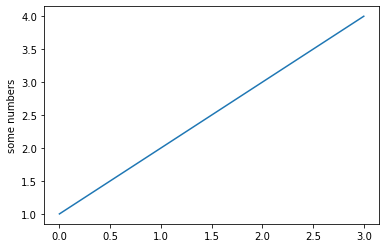

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [6]:
import numpy as np
import networkx as nx
import time
from model import Model
from network_visualisation import draw
import pickle
import pandas as pd
m = Model(perturbed_gene=10)

In [7]:
with open("cycles3.pkl", "rb") as f:
    cycles3 = pickle.load(f)

In [8]:
with open("cycles4.pkl", "rb") as f:
    cycles4 = pickle.load(f)

In [33]:
with open("cycles5.pkl", "rb") as f:
    cycles5 = pickle.load(f)

In [9]:
def rank_cycles(loops):
    flat_list = [item for sublist in loops for item in sublist]
    scores = []
    for idx, sublist in enumerate(flat_list):
        # score measures the strength of the loop
        score = 1
        previous = sublist[-1]
        for node in sublist:
            score = score * m.graph.get_edge_data(previous, node, default = 0)['alpha']
            previous = node
        scores.append([score, idx])
    scores.sort(reverse=True, key= lambda x: abs(x[0]))
    return scores

In [72]:
rank3 = rank_cycles(cycles3)

In [73]:
rank3[0][1]

1421

In [74]:
flat_list_3 = [item for sublist in cycles3 for item in sublist]
for i in rank3[0:10]:
    print(flat_list_3[i[1]])

['DAL5', 'SWI5']
['ASH1', 'PCL5', 'SWI5']
['REE1', 'PCL5', 'SWI5']
['HO', 'PCL5', 'SWI5']
['CPA2', 'PCL5', 'SWI5']
['ASH1', 'DAL5', 'SWI5']
['SNZ1', 'CBF1', 'SWI5']
['CRC1', 'PCL5', 'SWI5']
['ALT1', 'PCL5', 'SWI5']
['RME1', 'PCL5', 'SWI5']


In [11]:
rank4 = rank_cycles(cycles4)
rank4[0:10]

[[4.691895794191784e-10, 71834],
 [-9.669176613631822e-11, 21161],
 [-2.5552121046951807e-11, 207600],
 [5.319783595359249e-12, 139419],
 [-4.315539243022384e-12, 42960],
 [-4.119647714203483e-12, 19500],
 [3.389715926747615e-12, 229271],
 [-3.209131093353295e-12, 45436],
 [1.922472521939989e-12, 6263],
 [1.6250887036304129e-12, 215940]]

In [13]:
flat_list_4 = [item for sublist in cycles4 for item in sublist]

In [15]:
for i in rank4[0:15]:
    print(flat_list_4[i[1]])

['DAL5', 'SWI5']
['ASH1', 'PCL5', 'SWI5']
['REE1', 'PCL5', 'SWI5']
['HO', 'PCL5', 'SWI5']
['CPA2', 'PCL5', 'SWI5']
['ASH1', 'DAL5', 'SWI5']
['SNZ1', 'CBF1', 'SWI5']
['CRC1', 'PCL5', 'SWI5']
['ALT1', 'PCL5', 'SWI5']
['RME1', 'PCL5', 'SWI5']
['IDH1', 'PCL5', 'SWI5']
['PIR1', 'HO', 'PCL5', 'SWI5']
['ANB1', 'PCL5', 'SWI5']
['OSW2', 'PCL5', 'SWI5']
['YLL053C', 'PCL5', 'SWI5']


In [84]:
histogram_ = [item[0] for item in rank4]
histogram_[0:30]

[4.691895794191784e-10,
 -9.669176613631822e-11,
 -2.5552121046951807e-11,
 5.319783595359249e-12,
 -4.315539243022384e-12,
 -4.119647714203483e-12,
 3.389715926747615e-12,
 -3.209131093353295e-12,
 1.922472521939989e-12,
 1.6250887036304129e-12,
 1.5357193859257706e-12,
 1.5084282821522837e-12,
 -1.4250105963177002e-12,
 -1.2305088497043553e-12,
 -1.1749526894049074e-12,
 -1.0535591922578473e-12,
 9.808396991537568e-13,
 9.354361727911379e-13,
 -7.606732926611315e-13,
 -6.912874950365827e-13,
 -3.558532171261841e-13,
 3.403177500537678e-13,
 -3.282347915663363e-13,
 2.876703170503338e-13,
 2.3904548809523253e-13,
 2.1247950074896038e-13,
 -1.837512856699906e-13,
 1.817042920065097e-13,
 1.8094507898105819e-13,
 -1.7646609806561842e-13]

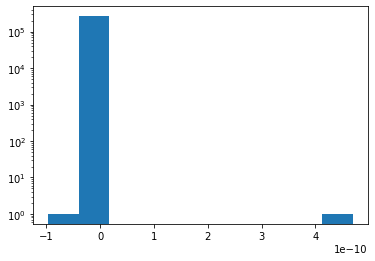

In [85]:
import matplotlib.pyplot as plt
plt.hist(histogram_)
plt.yscale('log')
plt.show()

In [61]:
rank5 = rank_cycles(cycles5)

In [64]:
flat_list_5 = [item for sublist in cycles5 for item in sublist]


In [65]:
for i in rank5[0:30]:
    print(flat_list_5[i[1]])

['SWI5', 'DAL5']
['SWI5', 'ASH1', 'PCL5']
['SWI5', 'REE1', 'PCL5']
['SWI5', 'HO', 'PCL5']
['SWI5', 'CPA2', 'PCL5']
['SWI5', 'ASH1', 'DAL5']
['SWI5', 'SNZ1', 'CBF1']
['SWI5', 'CRC1', 'PCL5']
['SWI5', 'ALT1', 'PCL5']
['SWI5', 'RME1', 'PCL5']
['SWI5', 'IDH1', 'PCL5']
['SWI5', 'PIR1', 'HO', 'PCL5']
['SWI5', 'ANB1', 'PCL5']
['SWI5', 'OSW2', 'PCL5']
['SWI5', 'YLL053C', 'PCL5']
['SWI5', 'PIR1', 'REE1', 'PCL5']
['SWI5', 'HBN1', 'PCL5']
['SWI5', 'FRE1', 'PCL5']
['SWI5', 'RME1', 'ECM22']
['SWI5', 'PBI1', 'ECM22']
['SWI5', 'FUS1', 'PCL5']
['SWI5', 'PBI1', 'FKH1']
['SWI5', 'HXT2', 'CPA2', 'PCL5']
['SWI5', 'GDH2', 'PCL5']
['SWI5', 'REG2', 'PCL5']
['SWI5', 'DAL80', 'PCL5']
['SWI5', 'DUR1,2', 'PCL5']
['SWI5', 'SAG1', 'PCL5']
['SWI5', 'MET31', 'PCL5']
['SWI5', 'CWP1', 'PCL5']


In [1]:
from model import Model

temp = Model()
m = Model(perturbed_gene=temp.graph.node['SWI5']['index'])
del temp


lst = ['CLN3', 'SWI5', 'CLN1', 'CLN2', 'CDH1', 'CDC20', 'CLB5', 'CLB6', 'SIC1', 'CLB1', 'CLB2', 'MCM1']
lst_index = [m.graph.node[element]['index'] for element in lst]
lst_index


m.cycle(dt= 1, track = lst_index, num_step = int(1e4))

10.0% are done
20.0% are done
30.0% are done
40.0% are done
50.0% are done
60.0% are done
70.0% are done
80.0% are done
90.0% are done
100.0% are done


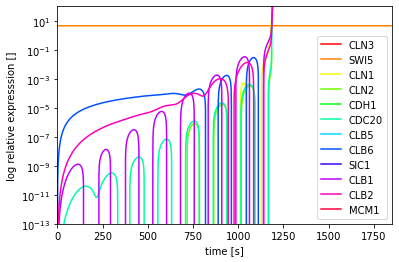

In [2]:
m.visualize(lst)

In [3]:
lst = ['CLN3', 'SWI5', 'CLN1', 'CLN2', 'CDH1', 'CDC20', 'CLB5', 'CLB6', 'SIC1', 'CLB1', 'CLB2', 'MCM1']
# lst = ['CLN3', 'CLN1', 'CLN2', 'CDH1', 'CDC20', 'CLB5', 'CLB6', 'SIC1', 'CLB1', 'CLB2', 'MCM1']
lst_index = [m.graph.node[element]['index'] for element in lst]
lst_index

[698, 4362, 696, 697, 632, 600, 690, 691, 3979, 686, 687, 2162]

In [3]:
import numpy as np
np.log(np.log(100))

1.5271796258079011

In [4]:
m.cycle(dt= 1, track = lst_index, num_step = int(1e4))

10.0% are done
20.0% are done
30.0% are done
40.0% are done
50.0% are done
60.0% are done
70.0% are done
80.0% are done
90.0% are done
100.0% are done


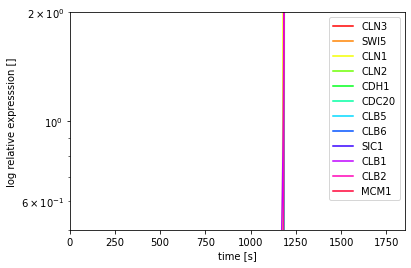

In [2]:
m.visualize(lst)